### Imports

In [2]:
import serial  # pip install pyserial
import numpy as np
import matplotlib.pyplot as plt

### Functions

In [3]:

def find_value(data_str, word, limit):
    word_index = data_str.find(word)
    while word_index < limit or word_index == -1:
        word_index = data_str.find(word, word_index + 1)
    
    if word_index == -1:
        print(word + " word not found in the string.")
    else:
        print(word + " word found at index:", word_index)
    return word_index

### Main

In [4]:

# Configure the serial port
# check the port first: ls /dev/tty.*
# /dev/tty.usbserial-1120 or 1140
ser = serial.Serial(
    port='/dev/tty.usbserial-1140',\
    baudrate=115200,\
    timeout=10)

print("connected to: " + ser.portstr)

# Read 1201 bytes of data from the serial port
data = ser.read(4802*2+1) # at least contain 1 image , 4802*2+1
print("Data received:", data)
data_str = data.decode('utf-8') # latin-1 # utf-8

# Find the "Start" and "End" words in the received data
start_index = find_value(data_str, "Start", 0)
start_index += 5 # Skip the "Start" word
end_index = find_value(data_str, "End", start_index)
gap = end_index - start_index
print("Gap between Start and End words:", gap)

# Convert the received data into a numpy array, from start to end
img_data = np.frombuffer(data[start_index:end_index], dtype=np.uint8)

# Print the received data
print(img_data)
print("Data length:", len(img_data))



connected to: /dev/tty.usbserial-1140
Data received: b'Start\x012222221-%\x1c\x1e")222211/)\x1e\x1d2222222222222222222222+&$ \x1f\x1f#,22222222222222222222222222(///.0///32-0222"\x10\x10\x10\x12\x12\x14\x16\x1c(22222222222222222222+,(""!")22221.22222222222222222222&)*+,*12.222211\x19\x10\x12\x12\x11\x12\x12\x12\x14\x18\x1d"2222222222222222222*+\'&*%!#\'222.**,2222222222222222/0#+,./0222-($!\x19\x13\x13\x11\x11\x10\x10\x10\x10\x12\x13\x14\x17\x1d&222222222222222222(%"%*%" %2222(\'+22221-+,/12221--+-"+-22222222$\x15\x13\x11\x10\x0f\x0f\x0f\x0e\x0e\x0e\x0e\x10\x13\x15\x18\x1f(22222222222222222&"\x1f#\'#!"\'0222+#%222.)\'()++++)\'\')\',\x1f+-22222222!\x14\x12\x10\x0f\x0e\x0e\x0f\x0f\x0e\r\r\x0e\x10\x13\x15\x19\x1f+2222222222222222$ \x1d\x1c\x1d\x1e!#%\'1221 !.22%!##%\'\'(&$#$&$)\x1e*,12222222\x1f\x14\x11\x0f\x0f\r\r\r\x0e\x0e\r\r\r\x0e\x10\x12\x16\x19"2222),2222222222%""#$ "$##%+)\x1e\x1c\x1c!)/\x1d\x1c\x1e\x1f!##$$ "#"!(\x1b)+/2222222\x1b\x13\x11\x0f\x0e\x0c\r\r\x0c\r\x0e\r\r\x0c\r\x0e\x1

[[50 50 50 ... 50 50 40]
 [47 47 47 ... 50 50 38]
 [41 42 43 ... 47 48 35]
 ...
 [32 34 35 ...  9  0  0]
 [32 33 34 ...  9  0  0]
 [31 33 34 ...  9  0  0]]


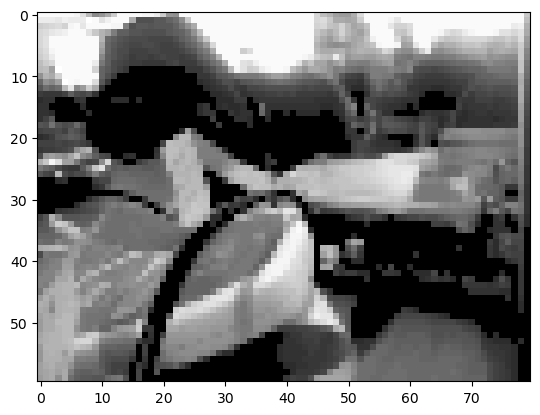

In [5]:
# my data in 1202 bytes long, disgard the first and last byte, the rest 1200 bytes are the image data

img = np.reshape(img_data[1:-1], (60, 80))
print(img)

plt.imshow(img, cmap='gray')